In [15]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, f1_score, classification_report, balanced_accuracy_score
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import joblib
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
def saveModels(model,f_name):
    model.save(f_name)
def loadModels(f_name):
    model=joblib.load(f_name)
    return model

In [3]:
def perf(true_vals,preds):
    con_mat=confusion_matrix(true_vals,preds)
    f1=f1_score(true_vals,preds)
    report=classification_report(true_vals,preds)
    accuracy=balanced_accuracy_score(true_vals,preds)
    print('F1 Score=',f1)
    print('Accuracy Score=',accuracy)
    print('Confusion Matrix=',con_mat)
    print(report)

In [4]:
df=pd.read_csv("../data/creditcard.csv")
print(df.shape)
df.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
print(df[df['Class']==1].shape)#Fraudulent Transactions
print(df[df['Class']==0].shape)#Non Fraud Transactions

(492, 31)
(284315, 31)


In [6]:
df['Amount']=StandardScaler().fit_transform(np.array(df['Amount']).reshape(-1, 1))
df=df.drop(['Time'],axis=1)
print(df.head())
df_non_fraud=df[df['Class']==0]
df_fraud=df[df['Class']==1]
print(df_non_fraud.shape)
print(df_fraud.shape)

         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V21       V22       V23       V24  \
0  0.098698  0.363787  0.090794  ... -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425 -0.166974  ... -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  0.207643  ...  0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024 -0.054952  ... -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  0.753074  ... -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28    Amount  Class  
0  0.12

In [7]:
X=df[df.columns[:-1]]
y=df[df.columns[-1]]
#smote=SMOTE(random_state=42)
#X_res,y_res=smote.fit_resample(X,y)

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
smote=SMOTE(random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
X_train_ov,y_train_ov=smote.fit_resample(X_train,y_train)
print(X_train_ov.shape)
print(y_train_ov.shape)

(199364, 29)
(199364,)
(85443, 29)
(85443,)
(398016, 29)
(398016,)


In [16]:
clf=AdaBoostClassifier(random_state=42)
clf.fit(X_train_ov,y_train_ov)

AdaBoostClassifier(random_state=42)

F1 Score= 0.10176282051282051
Accuracy Score= 0.9538237414487054
Confusion Matrix= [[83074  2233]
 [    9   127]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     85307
           1       0.05      0.93      0.10       136

    accuracy                           0.97     85443
   macro avg       0.53      0.95      0.54     85443
weighted avg       1.00      0.97      0.99     85443



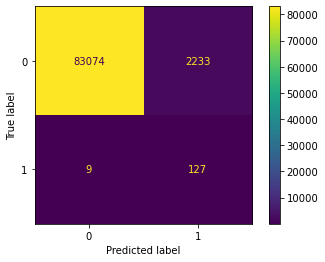

In [17]:
preds=clf.predict(X_test)
perf(y_test,preds)
ConfusionMatrixDisplay.from_predictions(y_test,preds)
plt.savefig('../pictures/adaboost_mat.png',bbox_inches='tight')
plt.show()

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [12]:
params={
    'n_estimators':[50,75,100,200],
    'learning_rate':[0.05,0.5,0.7,1.1],
    'algorithm':['SAMME','SAMME.R'],
    'base_estimator':[
        DecisionTreeClassifier(max_depth=1),
        DecisionTreeClassifier(max_depth=2),
        DecisionTreeClassifier(max_depth=3),
    ]
}
metrs=['f1','balanced_accuracy']

In [14]:
'''clf=GridSearchCV(
    AdaBoostClassifier(random_state=42),
    param_grid=params,
    scoring=metrs,
    refit='f1',
    verbose=1,
    n_jobs=-1)
clf.fit(X_train_ov,y_train_ov)'''

"clf=GridSearchCV(\n    AdaBoostClassifier(random_state=42),\n    param_grid=params,\n    scoring=metrs,\n    refit='f1',\n    verbose=1,\n    n_jobs=-1)\nclf.fit(X_train_ov,y_train_ov)"

In [9]:
lr=LogisticRegression(random_state=42).fit(X_train_ov,y_train_ov)
preds=lr.predict(X_test)

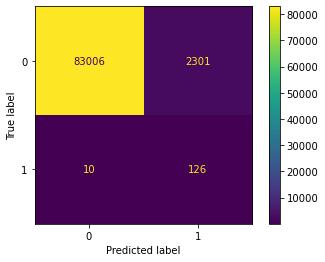

In [10]:
ConfusionMatrixDisplay.from_predictions(y_test,preds)
plt.savefig('../pictures/lr_mat.png',bbox_inches='tight')
plt.show()

In [11]:
perf(y_test,preds)

F1 Score= 0.0983222785797893
Accuracy Score= 0.9497487103671929
Confusion Matrix= [[83006  2301]
 [   10   126]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     85307
           1       0.05      0.93      0.10       136

    accuracy                           0.97     85443
   macro avg       0.53      0.95      0.54     85443
weighted avg       1.00      0.97      0.98     85443



In [13]:
joblib.dump(lr,'../models/LogReg.pkl')

['../models/LogReg.pkl']